

![Alt text](descargar.jpg)

## Intro

Proyecto de Analisis de datos NBA usando una api para la descarga de varios csv ("Lideres de la liga" y Lideres historicos ordenado). 

El primer csv es un ejercicio sencillo de llamada a la api mientras que el segundo es algo mas complejo al ser varios dataframes en el que uso concat.

## Hipotesis

Lideres de cada categoria:

¿Es un base para asistencias? 
¿Tiene el mejor porcentaje de 3 un alero?
¿Un pivot para rebotes?

Lideres historicos:

¿Es Lebron James el mejor jugador en mas categorias?

¿Hay mas jugadores activos en la NBA en el top 100 historico que retirados?

¿Hay una correlacion entre los tiros de Lebron James y el numero de personas que se dedican a cambiar ruedas en Carolina del norte?

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

lideres = pd.read_csv("Lideres de la liga.csv"),

lideres

(     PLAYER_ID  RANK                   PLAYER     TEAM_ID TEAM  GP   MIN  FGM  \
 0      1628983     1  Shai Gilgeous-Alexander  1610612760  OKC  76  2598  860   
 1      1630162     2          Anthony Edwards  1610612750  MIN  79  2871  721   
 2       203999     3             Nikola Jokic  1610612743  DEN  70  2571  786   
 3       203507     4    Giannis Antetokounmpo  1610612749  MIL  67  2289  793   
 4      1628369     5             Jayson Tatum  1610612738  BOS  72  2624  662   
 ..         ...   ...                      ...         ...  ...  ..   ...  ...   
 564    1630644   561              Mac McClung  1610612753  ORL   2    10    0   
 565    1642434   561              Riley Minix  1610612759  SAS   1     7    0   
 566    1629056   561            Terence Davis  1610612758  SAC   1     8    0   
 567    1630678   561             Terry Taylor  1610612758  SAC   3     6    0   
 568    1642389   561              Zyon Pullin  1610612763  MEM   3     3    0   
 
       FGA  FG

In [82]:

lideres_df = lideres[0] 
lideres_df = lideres_df.head(200) 

lideres_fg_pct = lideres_df[["PLAYER", "FG_PCT"]]
lideres_fg_pct = lideres_fg_pct.sort_values(by="FG_PCT", ascending=False)
top10_fg_pct = lideres_fg_pct.head(10)

print(top10_fg_pct)


                    PLAYER  FG_PCT
71           Jarrett Allen   0.706
153         Daniel Gafford   0.702
95             Jalen Duren   0.692
106            Rudy Gobert   0.669
175         Walker Kessler   0.663
40             Ivica Zubac   0.628
116           Jakob Poeltl   0.627
168          Mark Williams   0.604
3    Giannis Antetokounmpo   0.601
41        Domantas Sabonis   0.590


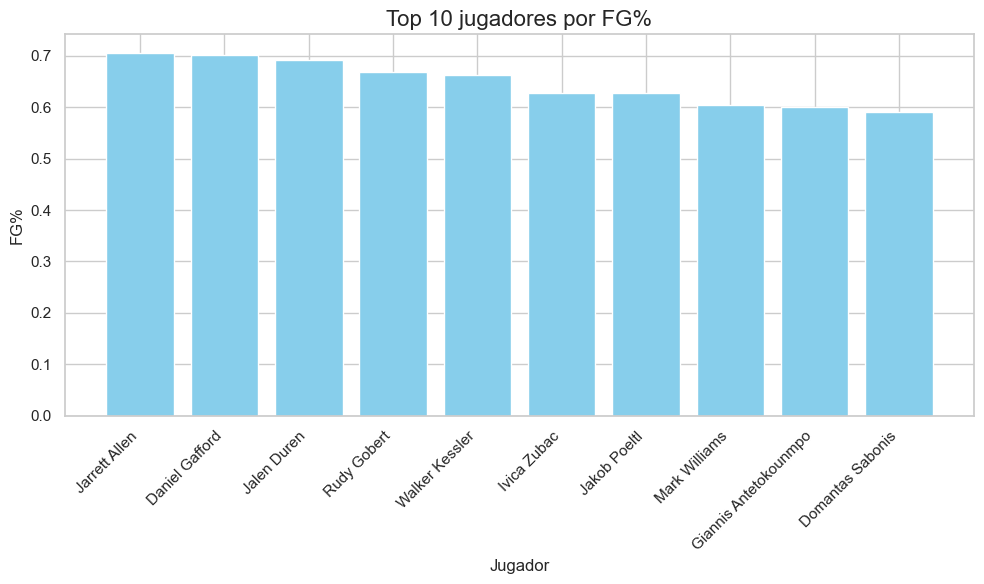

In [83]:
top10_fg_pct = lideres_fg_pct.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top10_fg_pct["PLAYER"], top10_fg_pct["FG_PCT"], color="skyblue")
plt.title("Top 10 jugadores por FG%", fontsize=16)
plt.xlabel("Jugador", fontsize=12)
plt.ylabel("FG%", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [84]:
lideres_df = lideres[0] 
lideres_df = lideres_df.head(200) 

lideres_fg3_pct = lideres_df[["PLAYER", "FG3_PCT"]]
lideres_fg3_pct = lideres_fg3_pct.sort_values(by="FG3_PCT", ascending=False)
top10_fg3_pct = lideres_fg3_pct.head(10)

print(top10_fg3_pct)


               PLAYER  FG3_PCT
11        Zach LaVine    0.446
103         Ty Jerome    0.439
173    Taurean Prince    0.439
138      Aaron Gordon    0.436
82    Harrison Barnes    0.433
199      Luke Kennard    0.433
170        Keon Ellis    0.433
18       Kevin Durant    0.430
162     Grayson Allen    0.426
131  Brice Sensabaugh    0.422


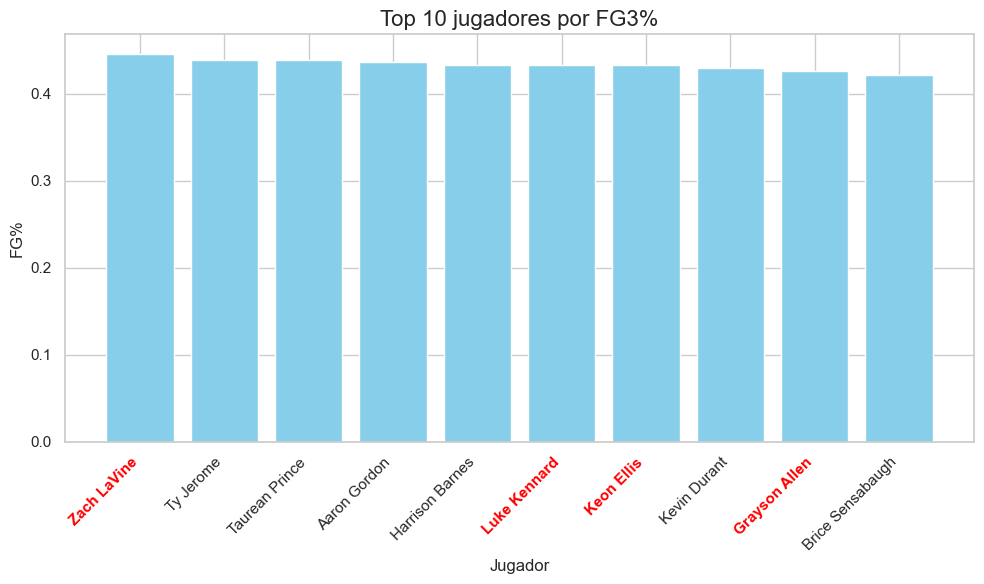

In [92]:
top10_fg3_pct = lideres_fg3_pct.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top10_fg3_pct["PLAYER"], top10_fg3_pct["FG3_PCT"], color="skyblue")
plt.title("Top 10 jugadores por FG3%", fontsize=16)
plt.xlabel("Jugador", fontsize=12)
plt.ylabel("FG%", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


for label in plt.gca().get_xticklabels():
    if "Zach LaVine" in label.get_text():
        label.set_color("red")
        label.set_fontweight("bold")
    elif "Luke Kennard" in label.get_text():
        label.set_color("red")
        label.set_fontweight("bold")
    elif "Keon Ellis" in label.get_text():
        label.set_color("red")
        label.set_fontweight("bold")
    elif "Grayson Allen" in label.get_text():
        label.set_color("red")
        label.set_fontweight("bold")
plt.show()

In [86]:
lideres_ast = lideres_df[["PLAYER", "AST"]]
lideres_ast = lideres_ast.sort_values(ascending=False, by="AST")
lideres_ast[:10]


,PLAYER,AST
6,Trae Young,880
2,Nikola Jokic,716
9,James Harden,687
37,Tyrese Haliburton,673
8,Cade Cunningham,638
146,Chris Paul,605
15,LeBron James,575
5,Devin Booker,529
21,Darius Garland,506
81,Josh Giddey,503


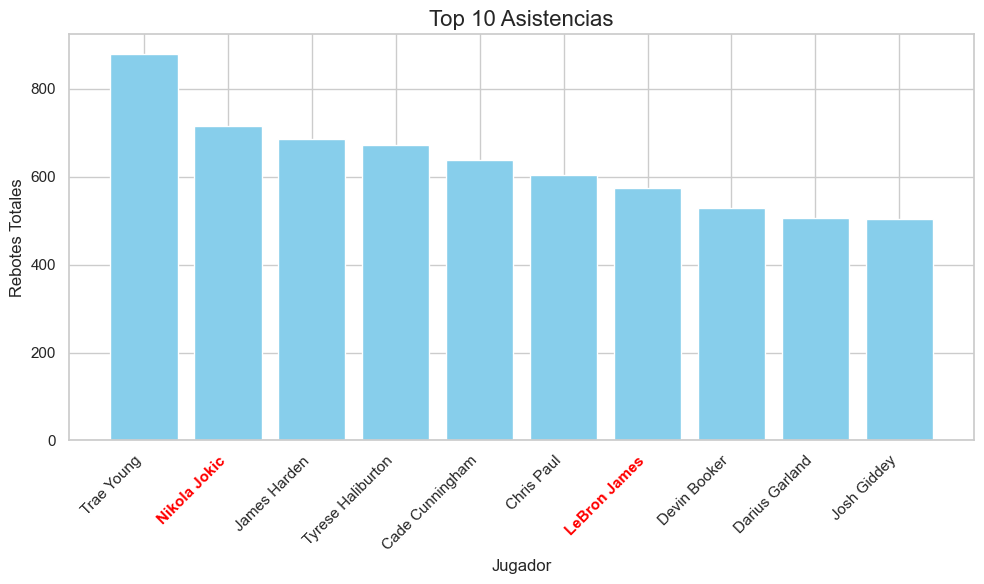

In [101]:
top10_ast = lideres_ast.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top10_ast["PLAYER"], top10_ast["AST"], color="skyblue")
plt.title("Top 10 Asistencias", fontsize=16)
plt.xlabel("Jugador", fontsize=12)
plt.ylabel("Rebotes Totales", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


for label in plt.gca().get_xticklabels():
    if "Nikola Jokic" in label.get_text():
        label.set_color("red")
        label.set_fontweight("bold")
    elif "LeBron James" in label.get_text():
        label.set_color("red")
        label.set_fontweight("bold")
plt.show()

In [63]:
lideres_reb = lideres_df[["PLAYER", "REB"]]
lideres_reb = lideres_reb.sort_values(ascending=False, by="REB")
lideres_reb[:10]

,PLAYER,REB
40,Ivica Zubac,1010
41,Domantas Sabonis,972
10,Karl-Anthony Towns,920
2,Nikola Jokić,892
95,Jalen Duren,807
71,Jarrett Allen,798
3,Giannis Antetokounmpo,798
26,Alperen Sengun,786
106,Rudy Gobert,785
31,Bam Adebayo,749


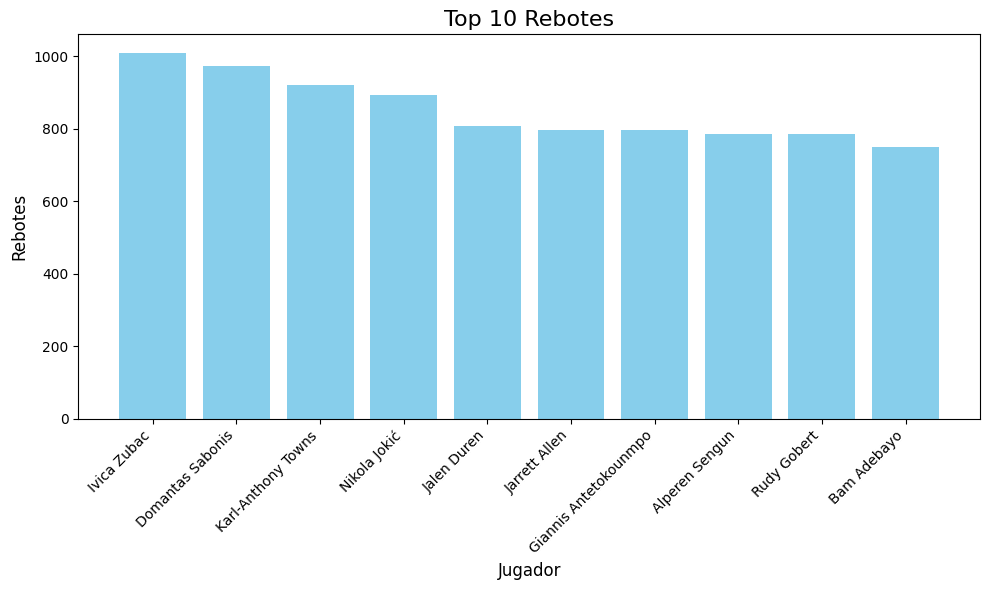

In [64]:
top10_reb = lideres_reb.head(10)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top10_reb["PLAYER"], top10_reb["REB"], color="skyblue")
plt.title("Top 10 Rebotes", fontsize=16)
plt.xlabel("Jugador", fontsize=12)
plt.ylabel("Rebotes", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


   PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  \
0       2544   2003-04        00  1610612739               CLE        19.0   
1       2544   2004-05        00  1610612739               CLE        20.0   
2       2544   2005-06        00  1610612739               CLE        21.0   
3       2544   2006-07        00  1610612739               CLE        22.0   
4       2544   2007-08        00  1610612739               CLE        23.0   

   GP  GS   MIN  FGM  ...  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV   PF  \
0  79  79  3120  622  ...   0.754    99   333  432  465  130   58  273  149   
1  80  80  3388  795  ...   0.750   111   477  588  577  177   52  262  146   
2  79  79  3361  875  ...   0.738    75   481  556  521  123   66  260  181   
3  78  78  3190  772  ...   0.698    83   443  526  470  125   55  250  171   
4  75  74  3027  794  ...   0.712   133   459  592  539  138   81  255  165   

    PTS  
0  1654  
1  2175  
2  2478  
3  2132  
4  225

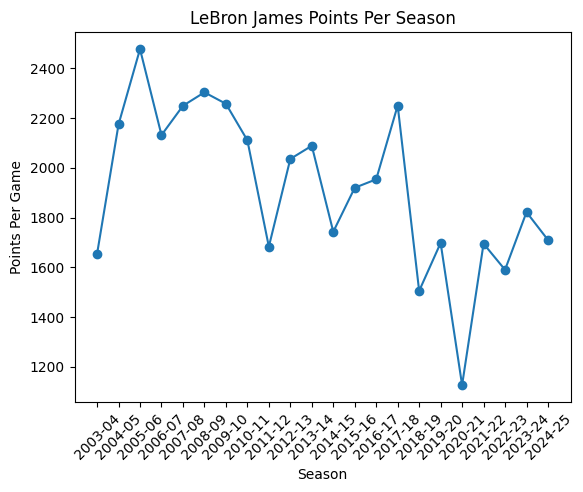

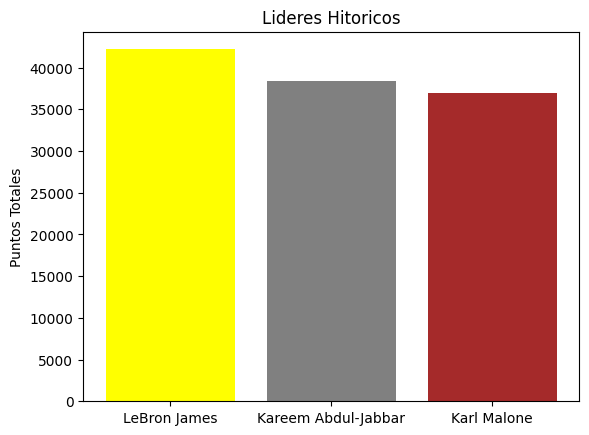

In [65]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats

# LeBron James' player ID
lebron = [player for player in players.get_players() if player['full_name'] == "LeBron James"][0]
lebron_id = lebron['id']

# estadisticas de carrera
career_stats = playercareerstats.PlayerCareerStats(player_id=lebron_id)
df = career_stats.get_data_frames()[0]
print(df.head())


# Averages de Lebron
career_averages = df[df['SEASON_ID'] == 'Career'][['PTS', 'REB', 'AST']]
print("LeBron's Career Averages:")
print(career_averages)

# Puntos de Lebron por temporada
df_season = df[df['SEASON_ID'] != 'Career']
plt.plot(df_season['SEASON_ID'], df_season['PTS'], marker='o')
plt.title("LeBron James Points Per Season")
plt.xlabel("Season")
plt.ylabel("Points Per Game")
plt.xticks(rotation=45)
plt.show()


# Lebron VS otros jugadores
all_time_points = {'LeBron James': 42184, 'Kareem Abdul-Jabbar': 38387, 'Karl Malone': 36928}
players = list(all_time_points.keys())
points = list(all_time_points.values())

plt.bar(players, points, color=['yellow', 'grey', 'brown'])
plt.title("Lideres Hitoricos")
plt.ylabel("Puntos Totales")
plt.show()

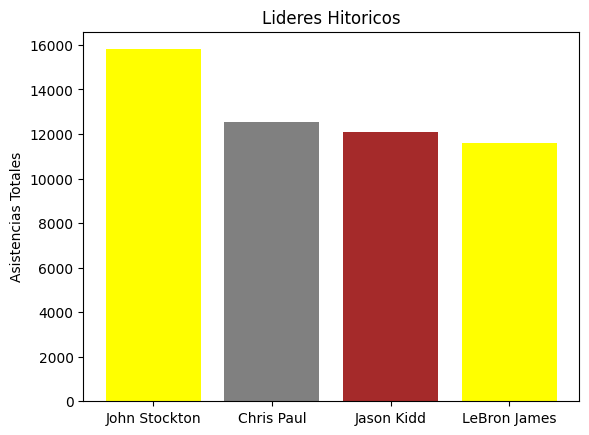

In [66]:
# Lebron VS otros jugadores
all_time_asis = {'John Stockton': 15806, 'Chris Paul': 12528, 'Jason Kidd': 12091 ,'LeBron James': 11584}
players = list(all_time_asis.keys())
points = list(all_time_asis.values())

plt.bar(players, points, color=['yellow', 'grey', 'brown'])
plt.title("Lideres Hitoricos")
plt.ylabel("Asistencias Totales")
plt.show()

In [67]:
historicos_stl

,PLAYER_ID,PLAYER_NAME,VALUE,RANK,IS_ACTIVE_FLAG,CATEGORY
30,304,John Stockton,3265.0,1,N,STL
31,101108,Chris Paul,2726.0,2,Y,STL
32,467,Jason Kidd,2684.0,3,N,STL
33,893,Michael Jordan,2514.0,4,N,STL
34,56,Gary Payton,2445.0,5,N,STL
35,2544,LeBron James,2345.0,6,Y,STL
36,76385,Maurice Cheeks,2310.0,7,N,STL
37,937,Scottie Pippen,2307.0,8,N,STL
38,17,Clyde Drexler,2207.0,9,N,STL
39,165,Hakeem Olajuwon,2162.0,10,N,STL


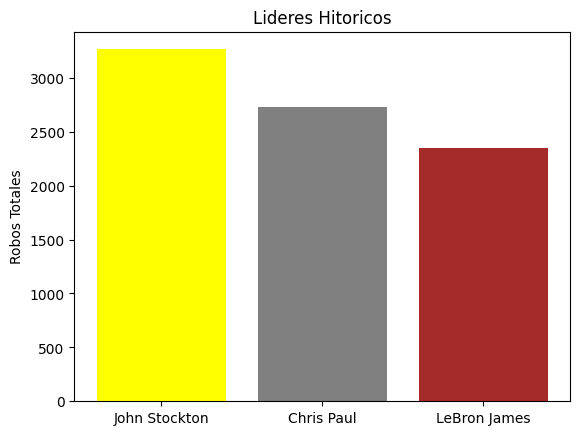

In [68]:
# Lebron VS otros jugadores
all_time_stl = {'John Stockton': 3265, 'Chris Paul': 2726,'LeBron James': 2345}
players = list(all_time_stl.keys())
points = list(all_time_stl.values())

plt.bar(players, points, color=['yellow', 'grey', 'brown'])
plt.title("Lideres Hitoricos")
plt.ylabel("Robos Totales")
plt.show()

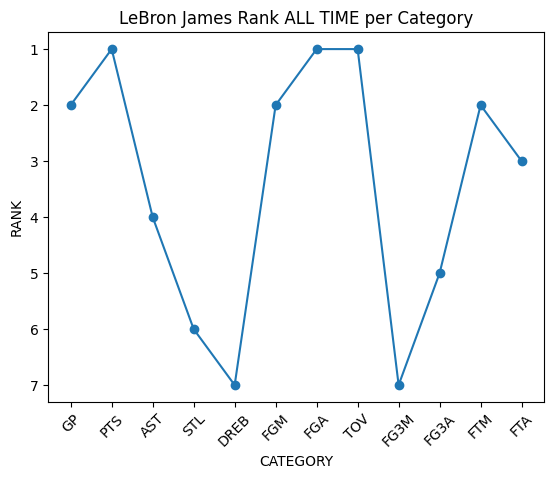

In [69]:
historicos = pd.read_csv("Lideres_historicos_ordenado.csv")

lebron_historico = historicos[historicos["PLAYER_NAME"] == "LeBron James"]

lebron_historico[["PLAYER_NAME", "RANK", "CATEGORY"]]

plt.plot(lebron_historico['CATEGORY'], lebron_historico['RANK'], marker='o')
plt.title("LeBron James Rank ALL TIME per Category")
plt.xlabel("CATEGORY")
plt.ylabel("RANK")
plt.xticks(rotation=45)

plt.gca().invert_yaxis()
plt.show()


C:\Users\ikerh\AppData\Local\Temp\ipykernel_21300\1979986141.py:21: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ikerh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


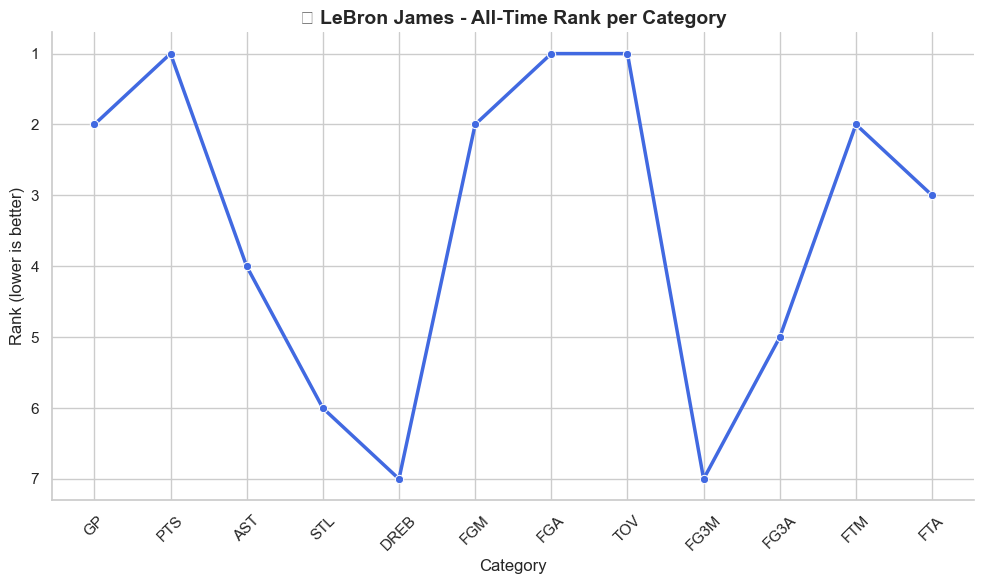

In [78]:
# Estilo general
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
sns.lineplot(
    data=lebron_historico,
    x='CATEGORY',
    y='RANK',
    marker='o',
    linewidth=2.5,
    color='royalblue'
)

plt.title("🏀 LeBron James - All-Time Rank per Category", fontsize=14, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Rank (lower is better)", fontsize=12)
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Mostrar mejores posiciones arriba

sns.despine()
plt.tight_layout()
plt.show()


C:\Users\ikerh\AppData\Local\Temp\ipykernel_21300\3359844792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ikerh\AppData\Local\Temp\ipykernel_21300\3359844792.py:13: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ikerh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


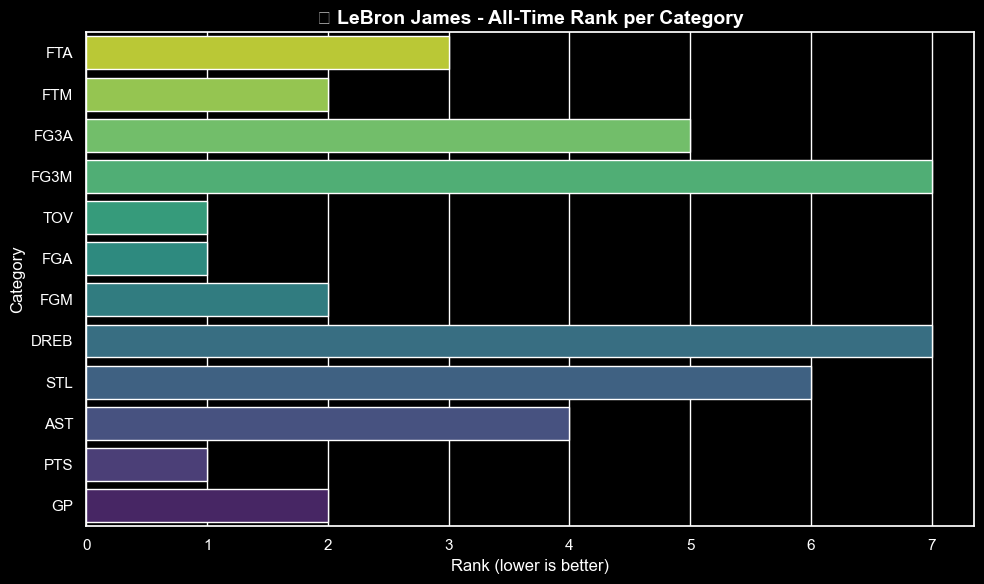

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=lebron_historico,
    y='CATEGORY',
    x='RANK',
    palette='viridis'
)

plt.title("🏀 LeBron James - All-Time Rank per Category", fontsize=14, fontweight='bold')
plt.xlabel("Rank (lower is better)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.gca().invert_yaxis()  # 1 a la izquierda
plt.tight_layout()
plt.show()




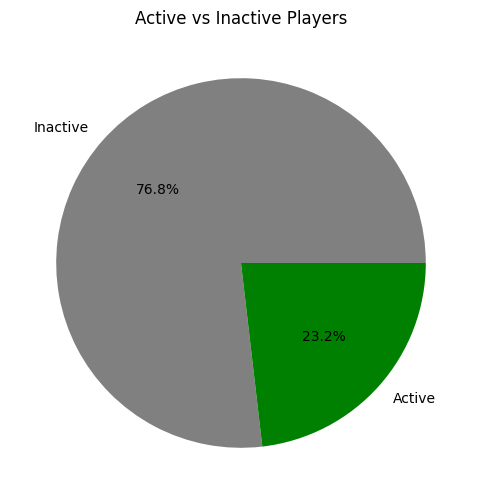

In [ ]:
historicos = pd.read_csv("Lideres_historicos_ordenado.csv")

historicos.set_index("RANK")

historicos[historicos["IS_ACTIVE_FLAG"] == "Y"].value_counts

historicos_activos = historicos[historicos["IS_ACTIVE_FLAG"] == "Y"]

status_counts = historicos["IS_ACTIVE_FLAG"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=["Inactive", "Active"], autopct='%1.1f%%', colors=["grey", "green"])
plt.title("Active vs Inactive Players")
plt.show()



historicos_gp = historicos[historicos["CATEGORY"] == "GP"]

historicos_pts = historicos[historicos["CATEGORY"] == "PTS"]

historicos_ast = historicos[historicos["CATEGORY"] == "AST"]

historicos_stl = historicos[historicos["CATEGORY"] == "STL"]

historicos_orb = historicos[historicos["CATEGORY"] == "ORB"]

historicos_drb = historicos[historicos["CATEGORY"] == "DRB"]

historicos_reb = historicos[historicos["CATEGORY"] == "REB"]

historicos_blk = historicos[historicos["CATEGORY"] == "BLK"]

historicos_fgm = historicos[historicos["CATEGORY"] == "FGM"]

historicos_fga = historicos[historicos["CATEGORY"] == "FGA"]

historicos_fg_pct = historicos[historicos["CATEGORY"] == "FG_PCT"]

historicos_tov = historicos[historicos["CATEGORY"] == "TOV"]

historicos_fg3m = historicos[historicos["CATEGORY"] == "FG3M"]

historicos_fg3a= historicos[historicos["CATEGORY"] == "FG3A"]

historicos_pf= historicos[historicos["CATEGORY"] == "PF"]

historicos_ftm = historicos[historicos["CATEGORY"] == "FTM"]

historicos_fta = historicos[historicos["CATEGORY"] == "FTA"]

historicos_ft_pct= historicos[historicos["CATEGORY"] == "FT_PCT"]


In [37]:
historicos_fta

,PLAYER_ID,PLAYER_NAME,VALUE,RANK,IS_ACTIVE_FLAG,CATEGORY
170,252,Karl Malone,13188.0,1,N,FTA
171,76375,Wilt Chamberlain,11862.0,2,N,FTA
172,2544,LeBron James,11735.0,3,Y,FTA
173,406,Shaquille O'Neal,11252.0,4,N,FTA
174,77449,Moses Malone,11090.0,5,N,FTA
175,977,Kobe Bryant,10011.0,6,N,FTA
176,201935,James Harden,9527.0,7,Y,FTA
177,2730,Dwight Howard,9455.0,8,N,FTA
178,76003,Kareem Abdul-Jabbar,9304.0,9,N,FTA
179,600015,Oscar Robertson,9185.0,10,N,FTA


In [38]:
historicos["CATEGORY"].value_counts()

CATEGORY
GP         10
PTS        10
AST        10
STL        10
OREB       10
DREB       10
REB        10
BLK        10
FGM        10
FGA        10
FG_PCT     10
TOV        10
FG3M       10
FG3A       10
FG3_PCT    10
PF         10
FTM        10
FTA        10
FT_PCT     10
Name: count, dtype: int64

Calcular la correlacion entre Numero de tiros de Lebron James y Numero de mecánicos que cambian y reparan ruedas en Carolina del norte...
Coeficiente de correlacion: 0.7849835098708715
R cuadrada: 0.6161991107691926
P-value: 4.146486594974442e-05


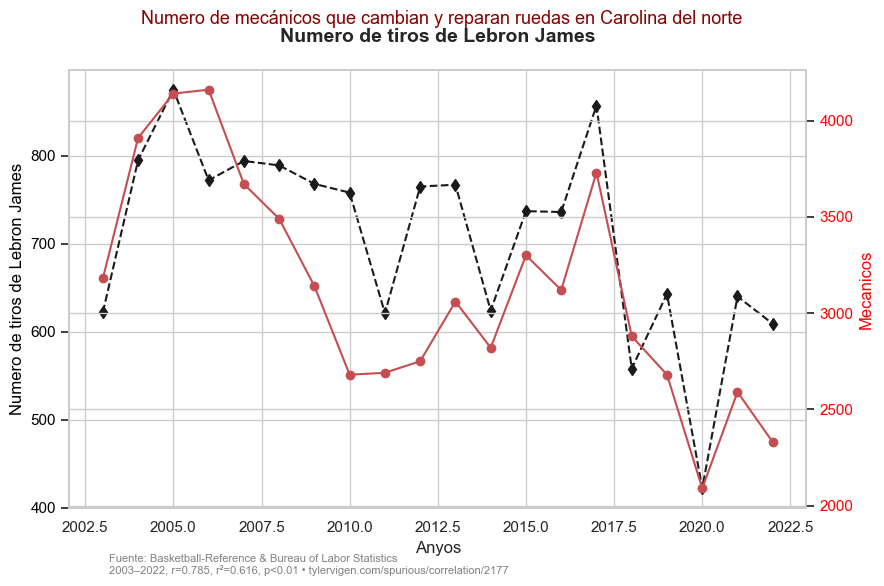

In [105]:

def calculate_correlation(array1, array2):

    # Correlacion de Pearson y p-value
    correlation, p_value = stats.pearsonr(array1, array2)

    # Calcular el R-squared como el cuadrado del coeficiente de correlacion
    r_squared = correlation**2

    return correlation, r_squared, p_value

array_1 = np.array([622,795,875,772,794,789,768,758,621,765,767,624,737,736,857,558,643,422,640,609,])
array_2 = np.array([3180,3910,4140,4160,3670,3490,3140,2680,2690,2750,3060,2820,3300,3120,3730,2880,2680,2090,2590,2330,])
correlation_df = pd.DataFrame({'Numero de tiros de Lebron James': array_1, 'Numero de mecánicos que cambian y reparan ruedas en Carolina del norte': array_2})
array_1_name = "Numero de tiros de Lebron James"
array_2_name = "Numero de mecánicos que cambian y reparan ruedas en Carolina del norte"

print(f"Calcular la correlacion entre {array_1_name} y {array_2_name}...")
correlation, r_squared, p_value = calculate_correlation(array_1, array_2)

print("Coeficiente de correlacion:", correlation)
print("R cuadrada:", r_squared)
print("P-value:", p_value)

years = np.arange(2003, 2023)

fig, ax1 = plt.subplots(figsize=(9, 6))

# Lebron
ax1.plot(years, array_1, 'k--', marker='d', label="Numero de tiros de Lebron James")
ax1.set_xlabel('Anyos')
ax1.set_ylabel('Numero de tiros de Lebron James', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Mecanicos
ax2 = ax1.twinx()
ax2.plot(years, array_2, 'r-', marker='o', label="Numero de mecánicos que cambian y reparan ruedas en Carolina del norte")
ax2.set_ylabel('Mecanicos', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titlulos
plt.title("Numero de tiros de Lebron James", fontsize=14, fontweight='bold', pad=20)
plt.suptitle("Numero de mecánicos que cambian y reparan ruedas en Carolina del norte", 
             fontsize=13, color='darkred', y=0.94)

# Anotaciones
plt.figtext(0.13, 0.02, 
            "Fuente: Basketball-Reference & Bureau of Labor Statistics",
            fontsize=8, color='gray')

plt.figtext(0.13, 0.00, 
            "2003–2022, r=0.785, r²=0.616, p<0.01 • tylervigen.com/spurious/correlation/2177",
            fontsize=8, color='gray')


fig.tight_layout()
plt.show()
